# University of North Carolina at Charlotte
# ITCS 5111 Natural Language Processing

# Group 22
## Instructor
- Dr. Samira Shaikh

## Team Members                                               
- Mohammed Hussain Musthaq Syed Nizam Babu                                                       
- Muthu Priya Shanmugakani Velsamy

# Data Source
The dataset is acquired from Kaggle competition "COVID-19 Open Research Dataset Challenge (CORD-19)"

Link to the dataset: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

# Data Description
This dataset was created by the Allen Institute for AI in partnership with the Chan Zuckerberg Initiative, Georgetown University’s Center for Security and Emerging Technology, Microsoft Research, IBM, and the National Library of Medicine - National Institutes of Health, in coordination with The White House Office of Science and Technology Policy. This is a periodically updated dataset and as of now it is of 25.35 GB.

In [1]:
## Import all required libraries
import numpy as np 
import pandas as pd 
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc

# Fetch the Dataset from Kaggle

In [2]:
# Fetching all the json files from Kaggle which contains research papers

# this finds our json files
path_to_json = '/kaggle/input/CORD-19-research-challenge/document_parses/pdf_json'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files

['a0d063dca746b135afe0451ce0b3bb1e06cf15ae.json',
 'edb294108440787c9f074483fd3c953a83e53622.json',
 'a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9.json',
 '6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff.json',
 '961458c62b1ac196cf312994ff02e5edbd6a1c6a.json',
 'c79ce955bfc71ffe8159bca6bc81d783a86d8edf.json',
 '5b17ddde53fd62a102981cec25dc581a27bfbfdb.json',
 'ffb0bc200097adb7dc05e011b1690ee6e08e1b87.json',
 'be9bdbb4987a83ad38fb0b65018528055e13eab7.json',
 '86b54363453c4ded55b68fb59179ddac57db4596.json',
 'acfb6e59bf5f762b7a749c4bdc3613360fdc2160.json',
 'fcb1c4ac23381ffb7dbeaad05aa5307cf4386912.json',
 '4f56c3f8ce546edfee88978ec4d38e76b046a2ab.json',
 'd2c1f7ac4c0683dd24d294a91600b464c4800f5d.json',
 'be5efc90a7e5e4cb3ba27f554d2af1f6269fce46.json',
 '027f8f76befbba9545cd612d08fcb5ed503a7114.json',
 '90ce0189f301119a51f8e39bab4db519670d2e98.json',
 '97acf17564239fe170cc68c9514daf5909f7d999.json',
 '9e277d3a38ec5bf379b333d675963086ee32e9f2.json',
 '3cfc7674f189b49a38eacfb52d12f6e3d5d36f98.json',


In [3]:
len(json_files)

138912

# Exploratory Data Analysis (EDA)

In [4]:
# here I define my pandas Dataframe with the columns I want to get from the json
# jsons_data = pd.DataFrame(columns=['country', 'city', 'long/lat'])
jsons_data = pd.DataFrame(columns=['paper_id', 'abstract', 'body_text'])

id2abstract = []
# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files[:1000]):     # Using 1000 files only to reduce memory load and resources
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        paper_id = json_text['paper_id']
#         abstract = json_text['abstract'][0]['text']
        abstract=''
        for entry in json_text['abstract']:
                abstract += entry['text']
        id2abstract.append({paper_id:abstract})
                #abstract.append(entry['text'])
        body_text=""
        for entry in json_text['body_text']:
                body_text += entry['text']
                #body_text.append(entry['text'])
                
        # here I push a list of data into a pandas DataFrame at row given by 'index'
        jsons_data.loc[index] = [paper_id, abstract, body_text]

# now that we have the pertinent json data in our DataFrame let's look at it
print(jsons_data)

                                     paper_id  \
0    a0d063dca746b135afe0451ce0b3bb1e06cf15ae   
1    edb294108440787c9f074483fd3c953a83e53622   
2    a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9   
3    6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff   
4    961458c62b1ac196cf312994ff02e5edbd6a1c6a   
..                                        ...   
995  d50f90c6b6d9441382b9d9032c1ded1fc12ca196   
996  d18a705998ad871dad46aeabeeed0a20909c10df   
997  9ff0fbcfa1e606dbd692b91c59f76e7f183958c2   
998  313d6762ff0c7e18ed7af39482b04fbd2d280bc7   
999  0903dd0da2be2a7b492da5e2eba573c7f44fb23f   

                                              abstract  \
0    Background Brazil ranks second worldwide in to...   
1                                                        
2                                                        
3    Coronavirus disease 2019 is a global pandemic ...   
4                                                        
..                                                 ...   
995  

In [5]:
# Display the dataframe
jsons_data

,paper_id,abstract,body_text
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...
1,edb294108440787c9f074483fd3c953a83e53622,,Die Corona-Pandemie ist eine Gefahr für die Ge...
2,a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9,,"To the editor, We read with great interest the..."
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...
4,961458c62b1ac196cf312994ff02e5edbd6a1c6a,,"civil and state cohesion, prosperity and power..."
...,...,...,...
995,d50f90c6b6d9441382b9d9032c1ded1fc12ca196,Stochasticity and spatial heterogeneity are of...,When the epidemiologists at a public health ag...
996,d18a705998ad871dad46aeabeeed0a20909c10df,Respiratory diseases are a major contributor t...,Establishment of a surveillance strategy in La...
997,9ff0fbcfa1e606dbd692b91c59f76e7f183958c2,The coronavirus disease (COVID-19) pandemic is...,The disease known as coronavirus caused by SAR...
998,313d6762ff0c7e18ed7af39482b04fbd2d280bc7,Glycosylation is a ubiquitous post-translation...,The increasing emergence of infectious disease...


In [6]:
df = jsons_data

In [7]:
# Describe the New processed Dataframe
df.describe()

,paper_id,abstract,body_text
count,1000,1000,1000
unique,1000,708,1000
top,b3c6008294a172e0609ee1467e87ec64ad242985,,Since the first report of coronavirus disease ...
freq,1,293,1


In [8]:
# # Converting the columns in list to string for easy processing of the columns while tokenising
# df['abstract'] = [' '.join(map(str, l)) for l in df['abstract']]
# df['body_text'] = [' '.join(map(str, l)) for l in df['body_text']]
# df.head()

# Data Preprocessing

## Word count

In [9]:
# Count of all tokens in the columns and unique words in the columns
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df['body_word_count'] = df['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df['body_unique_words']=df['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
1,edb294108440787c9f074483fd3c953a83e53622,,Die Corona-Pandemie ist eine Gefahr für die Ge...,0,2411,1263
2,a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9,,"To the editor, We read with great interest the...",0,94,76
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...,208,2841,1110
4,961458c62b1ac196cf312994ff02e5edbd6a1c6a,,"civil and state cohesion, prosperity and power...",0,5234,1869


## Check NULL Values

### Reasoning for Checking for NULL values
We have checked for NULL values, we need to remove all the NULL values before we train the model. This is because, NULL values don't have any values and they may cause a problem when the model is predicting.

In [10]:
# Check if NULL values are present in the dataset along with count of the NULL values
for col in df.columns:
    print(col, df[col].isnull().sum())

paper_id 0
abstract 0
body_text 0
abstract_word_count 0
body_word_count 0
body_unique_words 0


### Delete all rows for whose word count is 0

In [11]:
# Thanks to https://www.codegrepper.com/code-examples/delphi/delete+rows+pandas+if+column+contains
# Thanks to https://stackoverflow.com/questions/49841989/python-drop-value-0-row-in-specific-columns

# Let’s delete all rows for whose word count is 0
df.drop(df.index[df['abstract_word_count'] == 0], inplace = True)
df.drop(df.index[df['body_word_count'] == 0], inplace = True)
# df = df.loc[~((df['abstract_word_count'] == 0) | (df['body_word_count'] == 0))]
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...,208,2841,1110
5,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,The Asymptomatic novel CORonavirus iNfection (...,The World Health Organization first declared a...,261,1089,509
8,be9bdbb4987a83ad38fb0b65018528055e13eab7,Aims/hypothesis Transmembrane protein 27 (TMEM...,Type 2 diabetes is a complex disease that pres...,243,4445,1531
10,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,The purpose of this study was to assess the pe...,In the midst of a global COVID-19 pandemic (Wo...,225,7146,2382
...,...,...,...,...,...,...
995,d50f90c6b6d9441382b9d9032c1ded1fc12ca196,Stochasticity and spatial heterogeneity are of...,When the epidemiologists at a public health ag...,115,5837,1493
996,d18a705998ad871dad46aeabeeed0a20909c10df,Respiratory diseases are a major contributor t...,Establishment of a surveillance strategy in La...,272,4935,1725
997,9ff0fbcfa1e606dbd692b91c59f76e7f183958c2,The coronavirus disease (COVID-19) pandemic is...,The disease known as coronavirus caused by SAR...,359,2679,941
998,313d6762ff0c7e18ed7af39482b04fbd2d280bc7,Glycosylation is a ubiquitous post-translation...,The increasing emergence of infectious disease...,124,9163,2603


## Lower Case

### Reasoning for Converting to Lower case

We are converting all the strings to lower case because, when training the model, it should not treat the capitalized words and non-capitalized words differently which may decrease the accuracy of the model later. To treat them equal, we are converting all of the string to Lower case.

In [12]:
# Converting strings to Lower case
df["abstract"] = df["abstract"].str.lower() 
df["body_text"] = df["body_text"].str.lower() 
df.head(10)

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,background brazil ranks second worldwide in to...,the covid-19 pandemic has created an unprecede...,372,4086,1298
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 is a global pandemic ...,forces beyond your control can take away every...,208,2841,1110
5,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,the asymptomatic novel coronavirus infection (...,the world health organization first declared a...,261,1089,509
8,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims/hypothesis transmembrane protein 27 (tmem...,type 2 diabetes is a complex disease that pres...,243,4445,1531
10,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,the purpose of this study was to assess the pe...,in the midst of a global covid-19 pandemic (wo...,225,7146,2382
11,fcb1c4ac23381ffb7dbeaad05aa5307cf4386912,virus is known to resonate in the confined-aco...,"in the past few decades, tremendous efforts ha...",151,5438,1553
12,4f56c3f8ce546edfee88978ec4d38e76b046a2ab,matrix metalloproteinases (mmps)-induced alter...,cancer stands next to cardiovascular disease a...,243,3379,1383
14,be5efc90a7e5e4cb3ba27f554d2af1f6269fce46,| seasonal influenza vaccines lack efficacy ag...,vaccination represents an efficient and cost-e...,107,7101,2195
15,027f8f76befbba9545cd612d08fcb5ed503a7114,the aim of this study was to evaluate the conc...,airborne and droplet transmission are one of t...,232,2493,850
17,97acf17564239fe170cc68c9514daf5909f7d999,"singanayagam a, inhaled corticosteroids downre...",widely used in copd but the extent to which th...,81,1273,551


## Stop Words

### Reasoning for removing Stopwords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

The common language specific stop word list generally DOES NOT cover such domain specific terms. Similarly, for tweets, terms like “#” “RT”, “@username” can be potentially regarded as stop words.

In our dataset, we are dealing with research papers. So the words like 'doi', 'copyright','org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 'permission', 'fig', etc. are used more frequently which will not be considered as common stopwords in English. Hence we're customizing the stopwords list.

In [13]:
### load stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Thanks to https://medium.com/analytics-vidhya/text-summarization-on-covid-19-research-data-a5ab28695e11

stopwords_custom = nltk.corpus.stopwords.words('english')
customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may',
                        'associated','results','including','high''found','one','well','among','Abstract','provide',
                        'objective','objective:','background','range','features','participates','doi', 'preprint', 
                        'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table', 'rights', 'reserved', 
                        'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 
                        'Elsevier', 'PMC', 'CZI']
### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)

In [15]:
df['abstract'] = df['abstract'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid-19 pandemic created unprecedented worldw...,372,4086,1298
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
5,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection (acor...,world health organization first declared pande...,261,1089,509
8,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims/hypothesis transmembrane protein 27 (tmem...,type 2 diabetes complex disease presents beta ...,243,4445,1531
10,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,purpose assess perceptions attitudes south car...,midst global covid-19 pandemic (world health o...,225,7146,2382
...,...,...,...,...,...,...
995,d50f90c6b6d9441382b9d9032c1ded1fc12ca196,stochasticity spatial heterogeneity great inte...,epidemiologists public health agency detect si...,115,5837,1493
996,d18a705998ad871dad46aeabeeed0a20909c10df,respiratory diseases major contributor morbidi...,establishment surveillance strategy laos monit...,272,4935,1725
997,9ff0fbcfa1e606dbd692b91c59f76e7f183958c2,coronavirus disease (covid-19) pandemic highly...,"disease known coronavirus caused sars-cov-2, d...",359,2679,941
998,313d6762ff0c7e18ed7af39482b04fbd2d280bc7,glycosylation ubiquitous post-translational mo...,"increasing emergence infectious diseases, part...",124,9163,2603


## Contraction Words

### Reasoning for Replacing Contraction English words

For example,Who're you --> Who are you; Both sentences give the same meaning. In order to make the model understand that both are same and it should not treat them as seperate, we are replacing the contracted words.

In [16]:
# Installing the Contractions Package
!pip install contractions

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
# Using contractions library for replacing the contracted words in English 
import contractions
df['abstract'] = df['abstract'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
df.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid-19 pandemic created unprecedented worldw...,372,4086,1298
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
5,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection (acor...,world health organization first declared pande...,261,1089,509
8,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims/hypothesis transmembrane protein 27 (tmem...,type 2 diabetes complex disease presents beta ...,243,4445,1531
10,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,purpose assess perceptions attitudes south car...,midst global covid-19 pandemic (world health o...,225,7146,2382


## Remove punctuation marks

In [19]:
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
df['abstract'] = df['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df['body_text'] = df['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid 19 pandemic created unprecedented worldw...,372,4086,1298
3,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
5,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection acorn...,world health organization first declared pande...,261,1089,509
8,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims hypothesis transmembrane protein 27 tmem2...,type 2 diabetes complex disease presents beta ...,243,4445,1531
10,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,purpose assess perceptions attitudes south car...,midst global covid 19 pandemic world health or...,225,7146,2382
...,...,...,...,...,...,...
995,d50f90c6b6d9441382b9d9032c1ded1fc12ca196,stochasticity spatial heterogeneity great inte...,epidemiologists public health agency detect si...,115,5837,1493
996,d18a705998ad871dad46aeabeeed0a20909c10df,respiratory diseases major contributor morbidi...,establishment surveillance strategy laos monit...,272,4935,1725
997,9ff0fbcfa1e606dbd692b91c59f76e7f183958c2,coronavirus disease covid 19 pandemic highly i...,disease known coronavirus caused sars cov 2 de...,359,2679,941
998,313d6762ff0c7e18ed7af39482b04fbd2d280bc7,glycosylation ubiquitous post translational mo...,increasing emergence infectious diseases parti...,124,9163,2603


In [20]:
df = df.reset_index(drop=True)
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid 19 pandemic created unprecedented worldw...,372,4086,1298
1,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
2,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection acorn...,world health organization first declared pande...,261,1089,509
3,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims hypothesis transmembrane protein 27 tmem2...,type 2 diabetes complex disease presents beta ...,243,4445,1531
4,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,purpose assess perceptions attitudes south car...,midst global covid 19 pandemic world health or...,225,7146,2382
...,...,...,...,...,...,...
702,d50f90c6b6d9441382b9d9032c1ded1fc12ca196,stochasticity spatial heterogeneity great inte...,epidemiologists public health agency detect si...,115,5837,1493
703,d18a705998ad871dad46aeabeeed0a20909c10df,respiratory diseases major contributor morbidi...,establishment surveillance strategy laos monit...,272,4935,1725
704,9ff0fbcfa1e606dbd692b91c59f76e7f183958c2,coronavirus disease covid 19 pandemic highly i...,disease known coronavirus caused sars cov 2 de...,359,2679,941
705,313d6762ff0c7e18ed7af39482b04fbd2d280bc7,glycosylation ubiquitous post translational mo...,increasing emergence infectious diseases parti...,124,9163,2603


# Data Visualization

## Word Cloud

Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

In [21]:
# Thanks to https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5

# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

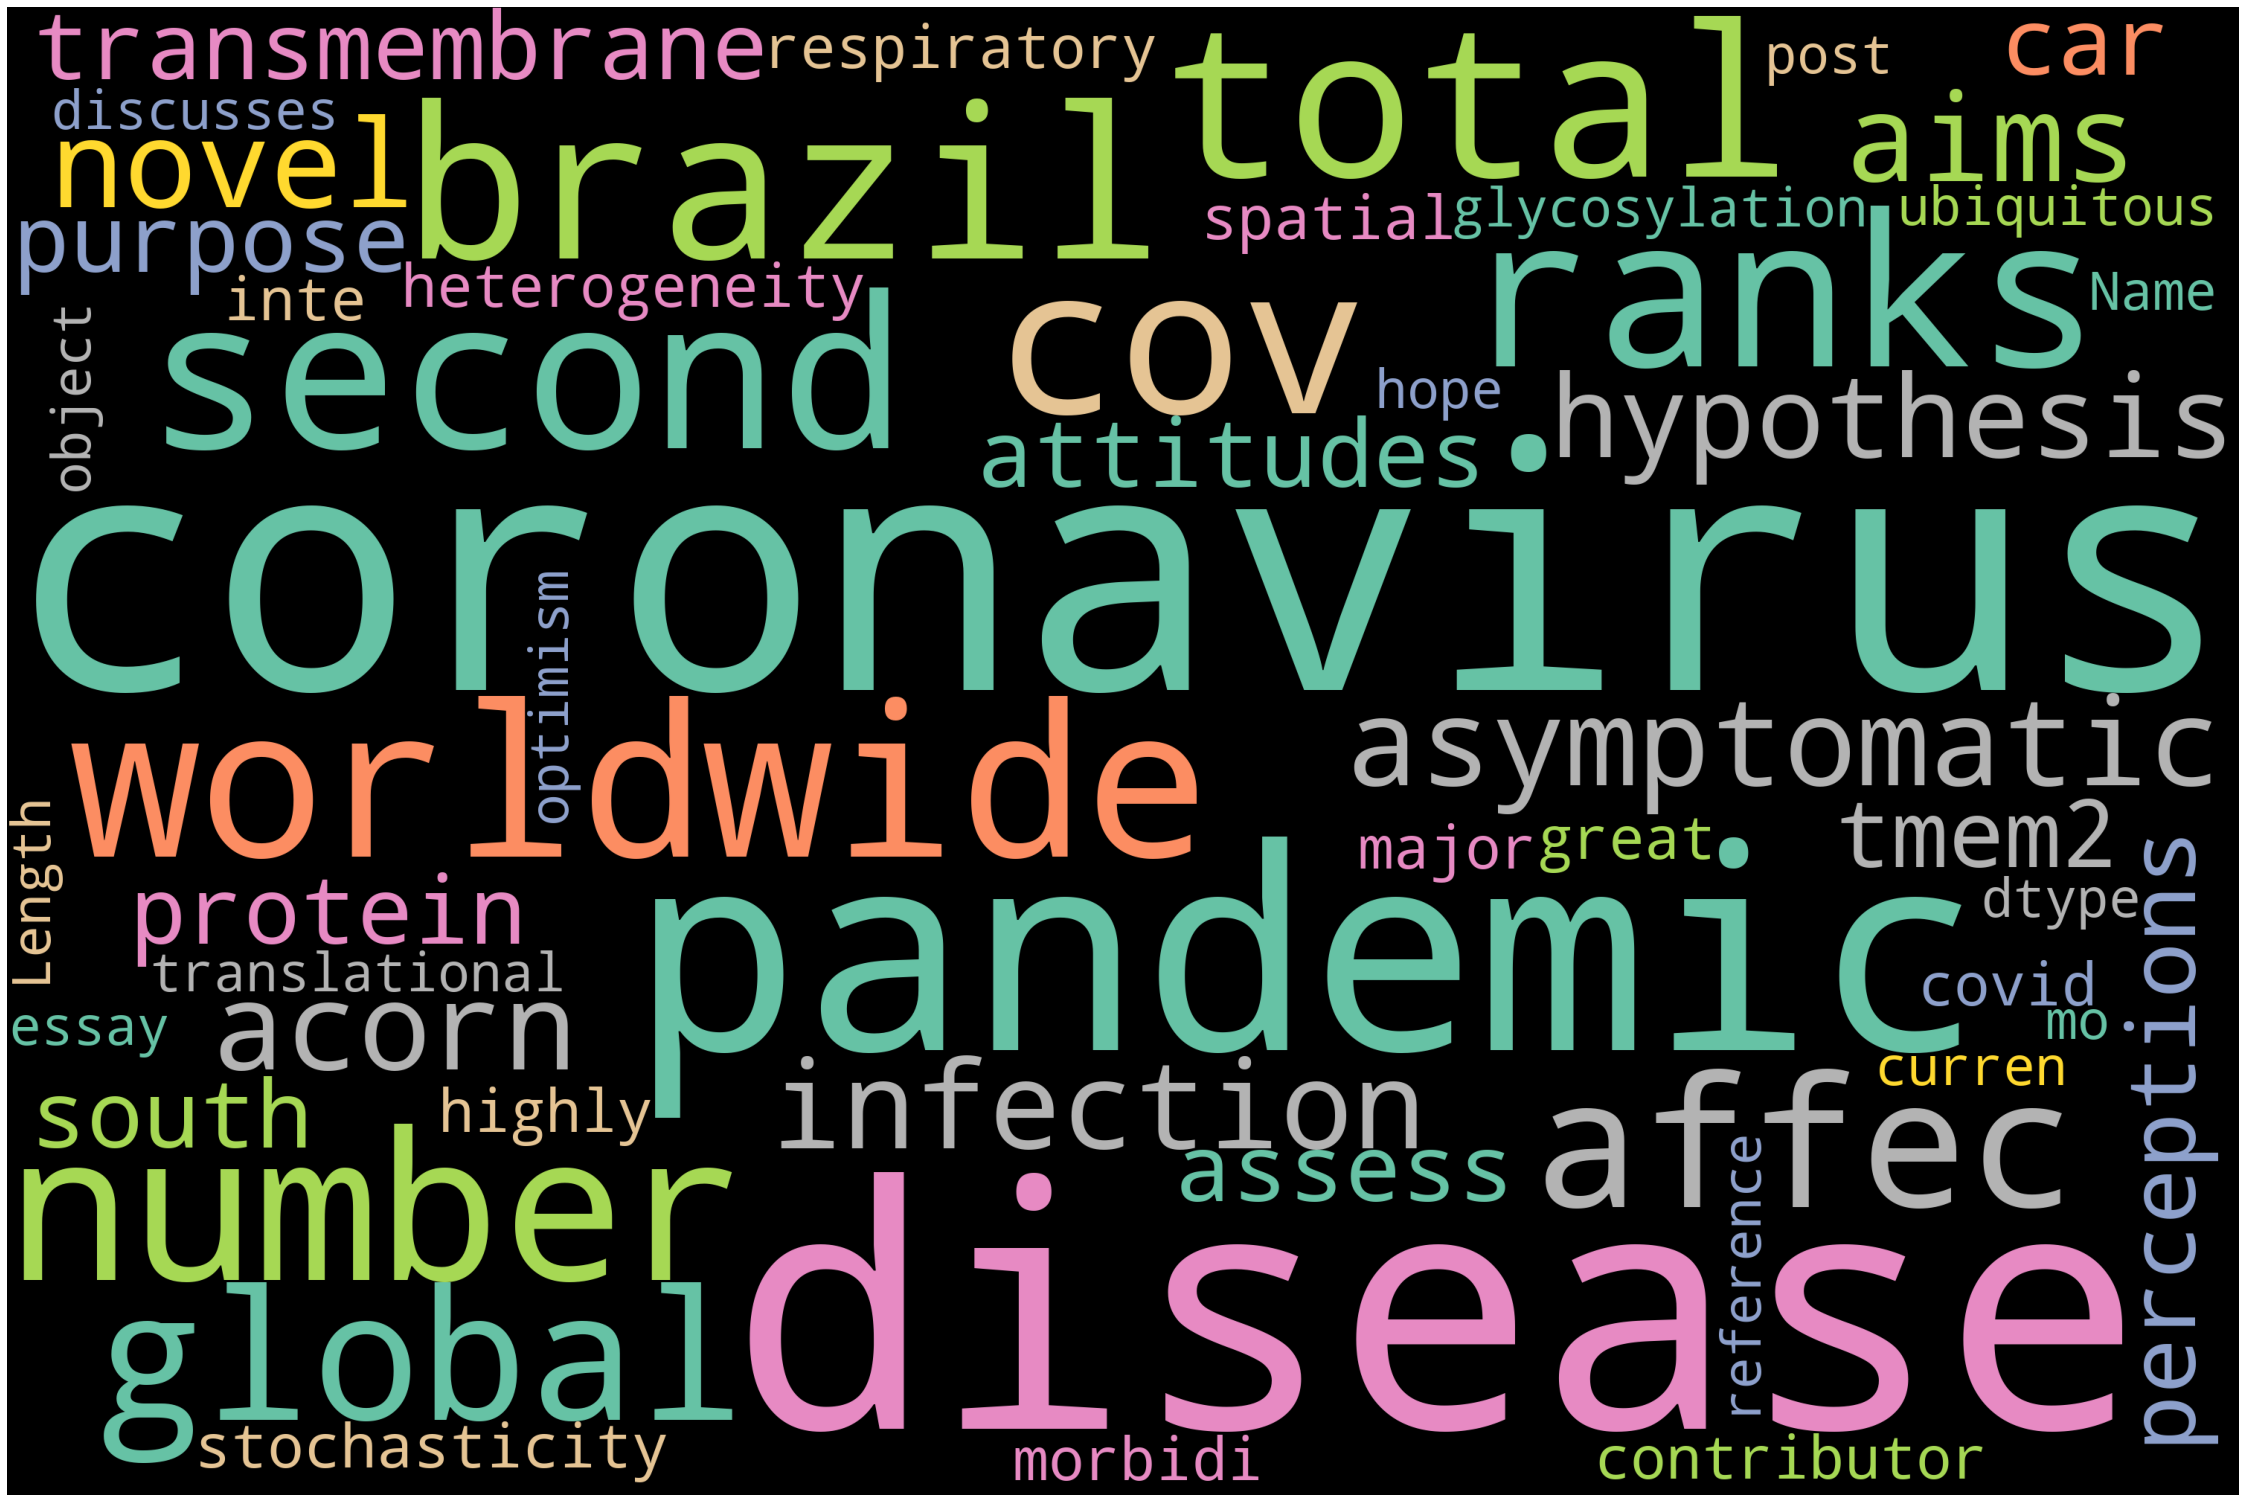

In [22]:
abstract_text = str(df.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(abstract_text)
# Plot
plot_cloud(wordcloud)

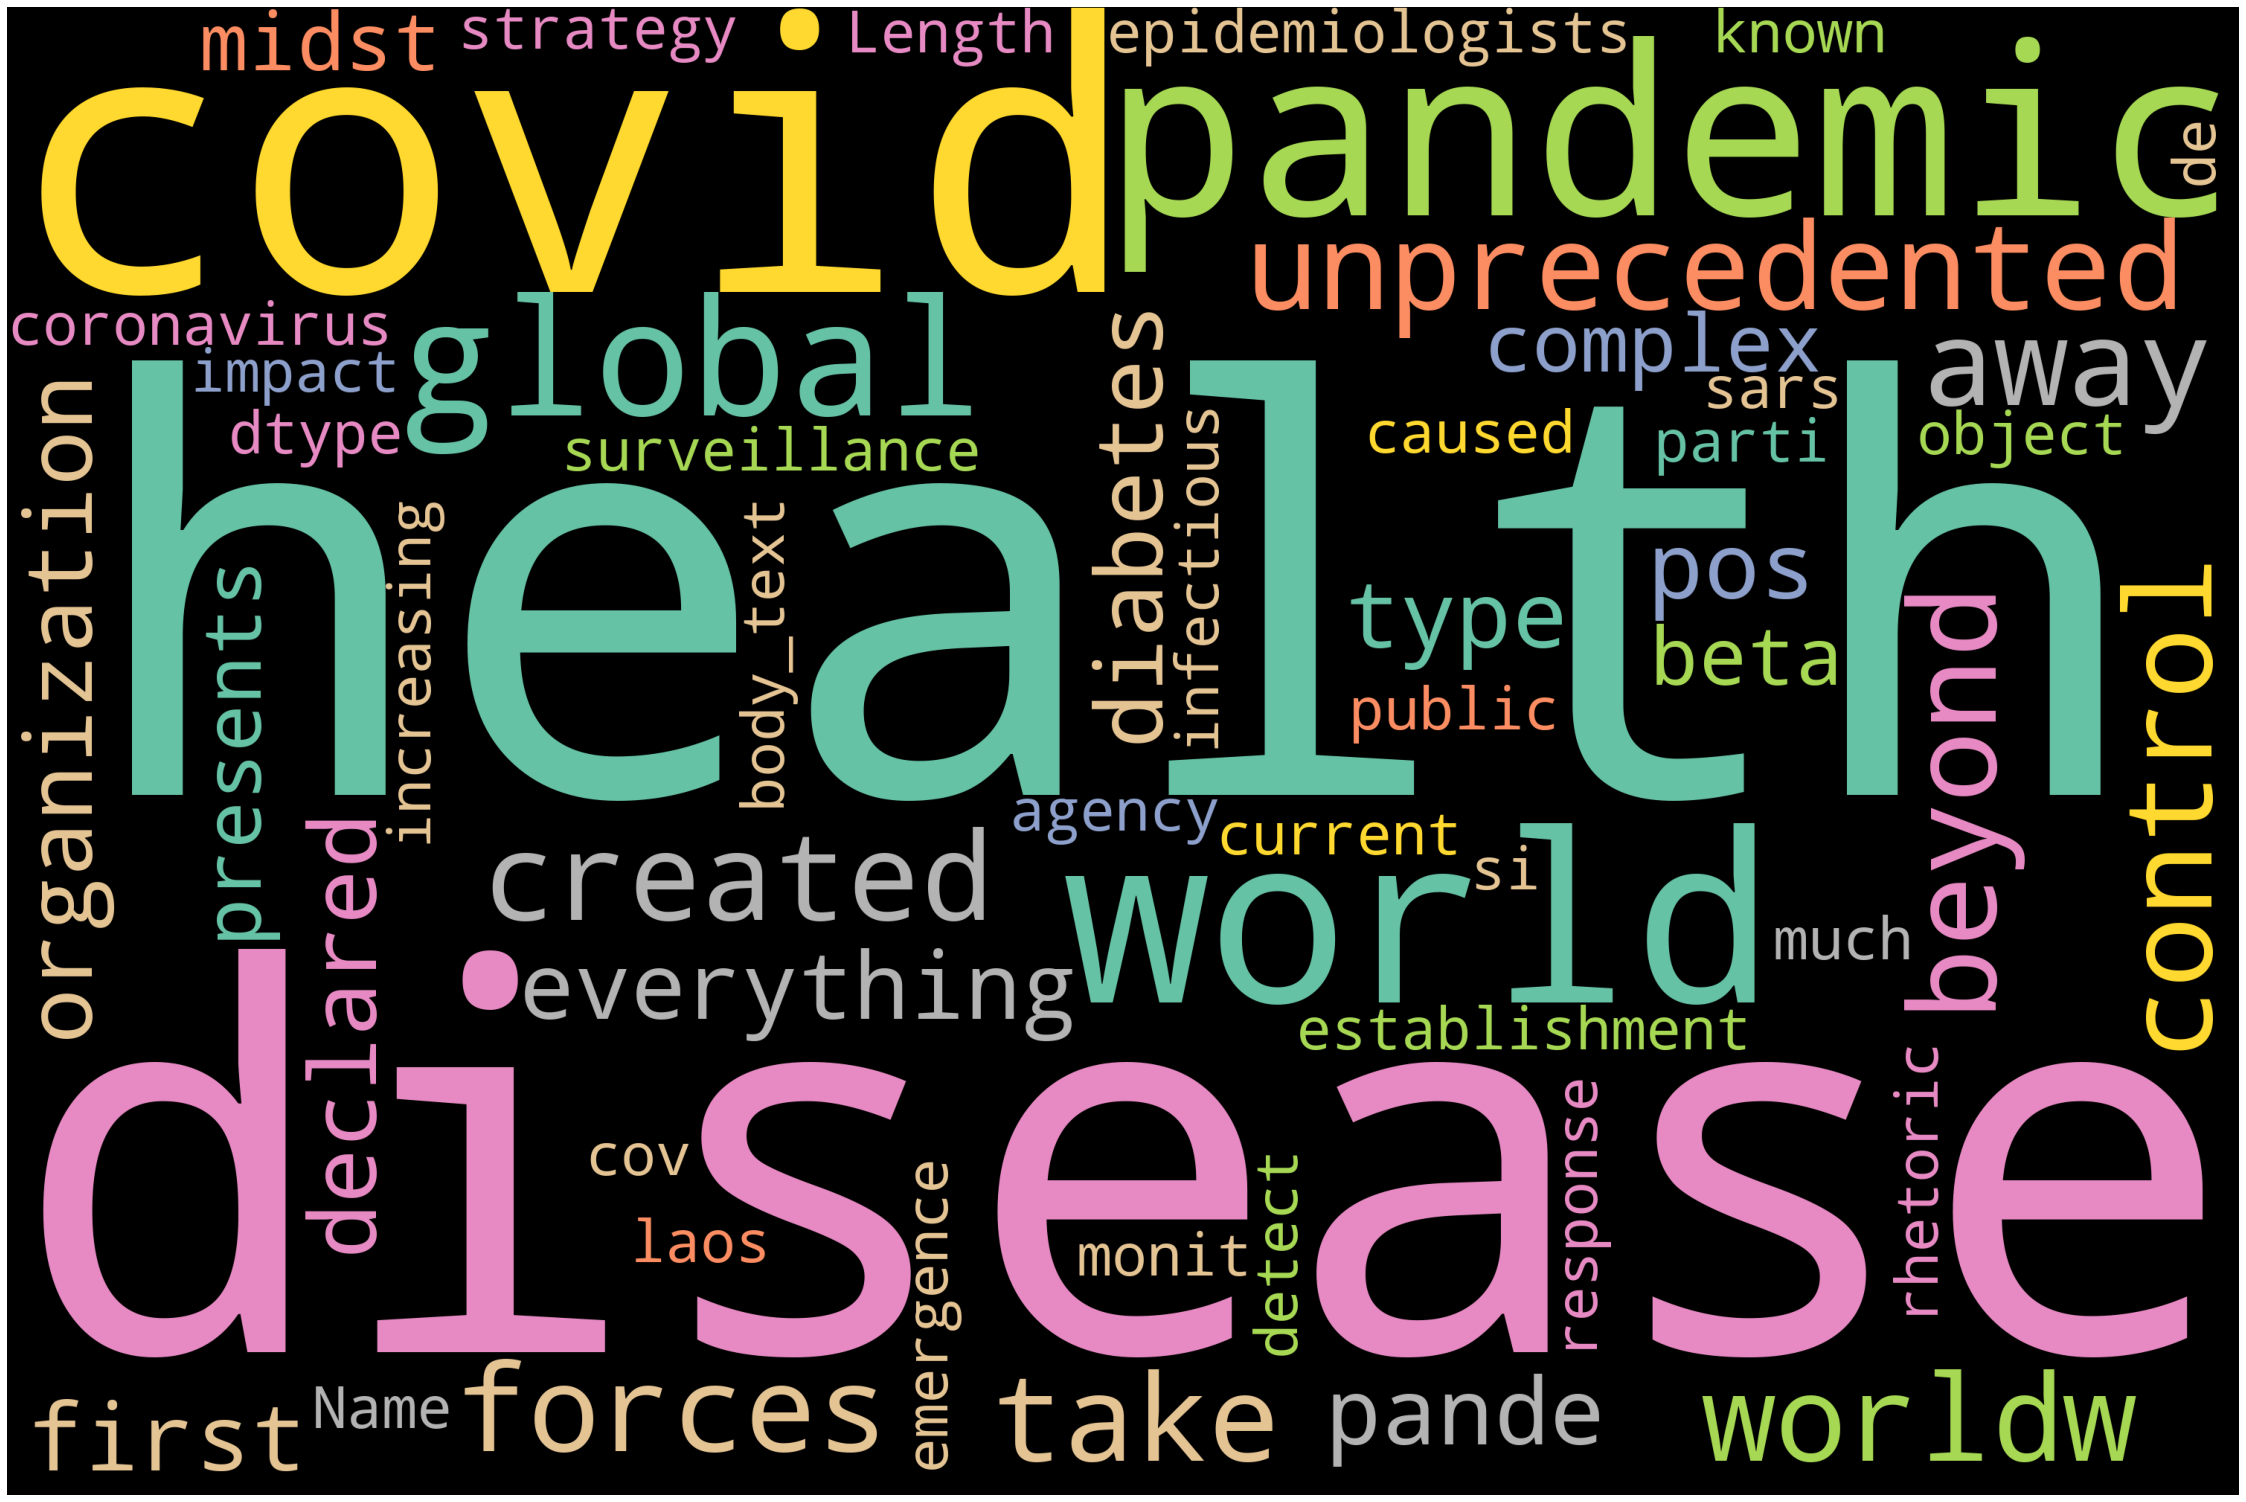

In [23]:
text = str(df.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(text)
# Plot
plot_cloud(wordcloud)

In [24]:
# from transformers import pipeline
# summarizer = pipeline("summarization")

In [25]:
# # Summarization
# for i, text in enumerate(df_test['abstract']):
#     summary_text = summarizer(df_test['abstract'].iloc[i], max_length=1000, min_length=30)
#     print(summary_text)
#     print()
#     df_test['abstract'].iloc[i] = summary_text[0]['summary_text']
#     #print(summary_text[0]['summary_text'])

# BERT QA Model & Text summarization

### Reasoning for the models chosen

#### Why BERT?

BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based method of learning language representations. It is a bidirectional transformer pre-trained model developed using a combination of two tasks namely: masked language modeling objective and next sentence prediction on a large corpus. Since we are dealing with large quantity of text corpus (COVID related articles) and BERT also had many pre-trained QA models (pipelines) which are trained on huge quantity of data. There are also models like "deepset/covid_bert_base" (trained on COVID data), "dmis-lab/biobert-base-cased-v1.1" (trained on medicine data) which supports QA modeling along with the sufficient data. So we opted out for BERT.

#### Why bert-large-cased-whole-word-masking-finetuned-squad?

The models that QA pipeline use is the model that have been fine-tuned on a question answering task. (Source: huggingface). Since we need to build QA model we opted for this model. It will be somewhat easy to fine tune a pre trained model according to our requirements instead of writing all the deep learning codes and training that model on huge and quality data to perform well. So we used pre-trained QA model and fine tuned according to our requirements of the dataset.

#### Why Summarization?

Summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Summarization has been used many practical applications — summarizing articles, summarizing multiple documents on the same topic, summarizing video content to generate highlights in sports etc. Summarization in text, specifically, can be extremely useful as it saves the users having to read long articles, blogs or other pieces of text. 

#### Why transformers Summarization pipeline model (transformers.QuestionAnsweringPipeline)?
For the process of summarization we used the pre tr****ained summarizer from transformers library. We used this model because its implementation is very simple and easy to understand and also it is from transformers library where BERT also belongs to. So we thought they could complement each other to tune the model and chode it.

In [26]:
# BERT QA model
from transformers import pipeline
nlp = pipeline('question-answering',model = 'bert-large-cased-whole-word-masking-finetuned-squad')

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [27]:
query_sample = "How to prevent Corona ?"
relevant_sentence = df['abstract'].values
nlp(question = query_sample, context = relevant_sentence)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'score': 0.1414981484413147,
 'start': 616,
 'end': 629,
 'answer': 'coronavirus 2'}

In [30]:
query_sample = "What is the Incubation period for COVID 19"
relevant_sentence = df['abstract']
nlp(question = query_sample, context = relevant_sentence)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'score': 1.5195507074849957e-08,
 'start': 876,
 'end': 884,
 'answer': 'covid 19'}

In [31]:
query_sample = "What is COVID 19"
relevant_sentence = df['body_text']
predicted_answer = nlp(question = query_sample, context = relevant_sentence)
nlp(question = query_sample, context = relevant_sentence)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'score': 0.5355414748191833,
 'start': 7133,
 'end': 7156,
 'answer': 'survivors non survivors'}

In [32]:
Summary_text_1 = predicted_answer['answer']

In [33]:
query_sample = "What is the Incubation period for COVID 19"
relevant_sentence = df['body_text']
predicted_answer = nlp(question = query_sample, context = relevant_sentence)
nlp(question = query_sample, context = relevant_sentence)

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'score': 0.2350313514471054,
 'start': 2659,
 'end': 2672,
 'answer': 'feb 27 4 2020'}

In [34]:
Summary_text_2 = predicted_answer['answer']

### For better results, the expected answers used in the model are acquired from Centers for Disease Control & Prevention (CDC) and US Food & Drug Association (FDA)

- CDC - https://www.cdc.gov/coronavirus/2019-ncov/faq.html

- FDA - https://www.fda.gov/emergency-preparedness-and-response/coronavirus-disease-2019-covid-19/covid-19-frequently-asked-questions

# Model Performance Metrics 


##### Model Performance Metrics: 

We have chosen BLEU (Bilingual evaluation understudy) score & ROUGE (Recall-Oriented Understudy for Gisting Evaluation) score as our model performance metrics. The reason behind the selection is described below.

BLEU score: It can be used to evaluate your generated text against a reference text. NLTK provides the sentence_bleu() function for evaluating a generated sentence against one or more reference sentences. BLEU computes the modified precision metric using n-grams. But one problem with BLEU scores is that they tend to favor short translations but not long.

ROUGE score: It is essentially of a set of metrics for evaluating automatic summarization of texts as well as machine translation. It works by comparing an automatically produced summary or translation against a set of reference summaries. It captures precision, recall and f1 score.

## BLEU Score

In [35]:
from nltk.translate.bleu_score import sentence_bleu   # Library to compare two sentences and calculate score using BLEU
from nltk.tokenize import word_tokenize  # NLTK library to tokenize the expected and acquired results

def compare_bleu(result, expected):    
    token_res = word_tokenize(result)    # Tokenize the acquired results
    token_exp = word_tokenize(expected)  # Tokenize the expected results
    score = sentence_bleu(token_res, token_exp)   # Compare two sentences and calculate score
    print("The BLEU score of accuracy is: ", score)

In [36]:
# Define the expected answer to a new variable
expected_Summary_text_1 = "Coronavirus disease 2019 (COVID-19) is a respiratory illness that can spread from person to person. CDC has information on COVID-19 symptoms and caring for yourself and others. COVID-19 is a new disease, caused by a novel (or new) coronavirus that has not previously been seen in humans. A novel coronavirus is a new coronavirus that has not been previously identified. The virus causing coronavirus disease 2019 (COVID-19), is not the same as the coronaviruses that commonly circulate among humans and cause mild illness, like the common cold."
expected_Summary_text_2 = "The incubation period for COVID-19 is thought to extend to 14 days, with a median time of 4-5 days from exposure to symptoms onset. One study reported that 97.5% of persons with COVID-19 who develop symptoms will do so within 11.5 days of SARS-CoV-2 infection."

In [37]:
compare_bleu(Summary_text_1, expected_Summary_text_1)

The BLEU score of accuracy is:  0


In [38]:
compare_bleu(Summary_text_2, expected_Summary_text_2)

The BLEU score of accuracy is:  0


## ROUGE Score

In [39]:
# Thanks to https://pypi.org/project/rouge-score/
!pip install rouge-score

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [40]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(Summary_text_1, expected_Summary_text_1)
scores

{'rouge1': Score(precision=0.0, recall=0.0, fmeasure=0.0),
 'rougeL': Score(precision=0.0, recall=0.0, fmeasure=0.0)}

In [41]:
scores = scorer.score(Summary_text_2, expected_Summary_text_2)
scores

{'rouge1': Score(precision=0.019230769230769232, recall=0.25, fmeasure=0.03571428571428572),
 'rougeL': Score(precision=0.019230769230769232, recall=0.25, fmeasure=0.03571428571428572)}

# Model Performance Evaluation

Prior to the answer for the query, the pretrained QA model returned its confidence score, along with the start position and its end position in the tokenized sentence. From the confidence score we can observe that the scorees are very low so as the result quality. The answer to the query is not the exact correct answer which we wanted but the model tried in finding the keywords to some extent. Since the predicted answer is not same as the expected answer, the BLEU and ROUGE score is nearly 0. 

If the model could be fine tuned in a better way to predict the expected answers, the accuracy of the model will definitely improve.

# Method-2 BERT QA & BART SUMMARIZATION

In [42]:
def text_preprocessing(tokens, start=0, stop=-1):
    tokens = tokens[start:stop] 
    if '[SEP]' in tokens:                      # [SEP] is for separating sentences for the next sentence prediction task. 
        sep_index = tokens.index('[SEP]')  
        tokens = tokens[sep_index + 1:]
    txt = ' '.join(tokens)          # Join all the tokens
    
    # Replace all the special characters which are unwanted
    txt = txt.replace(' ##', '')
    txt = txt.replace('##', '')
    
    txt = txt.strip()               # Remove unwanted spaces 
    txt = " ".join(txt.split())     # Join all the words
    
    # Remove unwanted space near the special charcters
    txt = txt.replace(' .', '.')
    txt = txt.replace('( ', '(')
    txt = txt.replace(' )', ')')
    txt = txt.replace(' - ', '-')
    
    txt_list = txt.split(' , ')     # Convert string to list of words seperated by comma
    txt = ''                        # Emptying the values in the variable 'txt' and keeping it as string type
    
    nTxtL = len(txt_list)           # Length of txt_list
    
    if nTxtL == 1:                  # If length of txt_list is 1 then display the first element in the list
        return txt_list[0]
    newList =[]                     # Empty list
    for i,t in enumerate(txt_list):
        if i < nTxtL -1:
            if t[-1].isdigit() and txt_list[i+1][0].isdigit():
                newList += [t,',']
            else:
                newList += [t, ', ']
        else:
            newList += [t]
    return ''.join(newList)

def extract_sentence(abstract,answer):
    abstract = abstract.lower() # Convert to lower case
    answer = answer.lower()
    split_byans = abstract.split(answer)  # list of sentences not words i.e., ['hlo B how r u'] not like ['hlo', 'B', 'how', 'r', 'u']
    if len(split_byans)==1:
        return split_byans[0][split_byans[0].rfind(". ")+1:]+" "+answer   # Combine abstract and answer
    else: 
        return split_byans[0][split_byans[0].rfind(". ")+1:]+" "+answer+split_byans[1][:split_byans[1].find(". ")+1]

# Load Qustion Answering (QA) using BERT 

In [43]:
from transformers import BertForQuestionAnswering # Bert QA model
from transformers import BertTokenizer
import torch

device = torch.device("cuda")
model_QA = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer_QA = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model_QA = model_QA.to(device)
model_QA = model_QA.eval()

In [44]:
# BART Summarization model
# Thanks to https://huggingface.co/transformers/model_doc/bart.html

from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn', output_past=True)

In [45]:
# def test_summary_model (abstract):
#     ARTICLE_TO_SUMMARIZE = abstract
#     inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')
#     model = model.to(device)  # Moving model to GPU device (if applicable or else CPU)
#     model.eval()
#     # Generate Summary
#     summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=55, early_stopping=True)
#     print([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_ids])

## Summary Model function

In [46]:
def Summary_Model(pd,count,model):
    total_abstract = ''           # Empty string       
    for i in range(len(pd[:count])):
        abss, ans = pd.loc[i,['abstract_by_ans','Answer']].values
        total_abstract += (abss + ".")
    ARTICLE_TO_SUMMARIZE = total_abstract       # Display best answer to the article
    #print(ARTICLE_TO_SUMMARIZE)

    # Token the article, if larger than 1024, then split the article
    tokens= tokenizer.tokenize(ARTICLE_TO_SUMMARIZE)  # Tokenizing the summarized article
    #print(tokens)
    max_seq_length = 1024  # Maximum sequence length i.e., count of tokens in the article
    longer = 0
    all_tokens=[]   # Empty list
    if len(tokens)>1024:
        for i in range(0,len(tokens),max_seq_length):
            tokens_a = tokens[i:i + max_seq_length]
            # Encode multiple sentences using tokenizer.batch_encode_plus
            # tokenizer.batch_encode_plus will generate a dictionary which contains the input_ids, token_type_ids and the attention_mask as list for each input sentence
            one_token = tokenizer.batch_encode_plus([tokens_a], max_length = 1024, return_tensors = 'pt')  # return_tensors = 'pt' If set, will return pyTorch objects instead of list of python integers.
            all_tokens.append(one_token)
    
    
    Summary_text = []
    
    # Decode the model output as a summary text
    def decode_text(summary_ids):
        text =''
        for g in summary_ids:
            #clean_up_tokenization_spaces - Clean up a list of simple English tokenization artifacts like spaces before punctuations and abreviated forms.
            text = text + tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False)
        return text
    
    # Summary model
    model = model.to(device)  # Moving model to GPU device (if applicable or else CPU)
    model.eval()
    Summary_text = ''
    for inputs in all_tokens:
        summary_ids = model.generate(inputs['input_ids'].to(device), num_beams=2, max_length=1000, early_stopping=True)
        Summary_text = Summary_text + " " + decode_text(summary_ids) 
    
    if Summary_text == '':
        Summary_text = "Can't find the answer. Try re-phrasing your question."
    #print (Summary_text)
    return Summary_text

## QA Model function

In [47]:
def ANS_Model(ques,count):
    question = ques
    answer_all=[]
    cons_all = []
    ID_list = []
    abstract_list = []
    for i in range(len(id2abstract[:count])):
        document = list(id2abstract[i].values())[0]  # Datatype is string which contains abstract
        ID = list(id2abstract[i].keys())[0]          # Datatype is string which contains paper id
        nWords = len(document.split())               # Length of tokens in the document
        input_ids_all = tokenizer_QA.encode(question, document) # Encode the document to ids
        tokens_all = tokenizer_QA.convert_ids_to_tokens(input_ids_all)  # Converts a token string (or a sequence of tokens) in a single integer id (or a sequence of ids), using the vocabulary.
        if len(input_ids_all) > 512:
            nFirstPiece = int(np.ceil(nWords/2))
            docSplit = document.split()   # Tokenized document
            docPieces = [' '.join(docSplit[:nFirstPiece]), ' '.join(docSplit[nFirstPiece:])]
            input_ids = [tokenizer_QA.encode(question, dp) for dp in docPieces]
        else:
            input_ids = [input_ids_all]   

        answers = []
        cons = []
        for iptIds in input_ids:
            tokens = tokenizer_QA.convert_ids_to_tokens(iptIds)
            sep_index = iptIds.index(tokenizer_QA.sep_token_id)   # sep_token_id = tokenizer.sep_token_id is A token used as a separator between question and text and it is also added to the end of the text.
            num_seg_a = sep_index + 1
            num_seg_b = len(iptIds) - num_seg_a
            segment_ids = [0]*num_seg_a + [1]*num_seg_b
            assert len(segment_ids) == len(iptIds)   # assert - check if condition is true, if false raises an Assertion error
            number_ids = len(segment_ids)

            if number_ids < 512:
                start_scores, end_scores = model_QA(torch.tensor([iptIds]).to(device), 
                                         token_type_ids=torch.tensor([segment_ids]).to(device))
            else:
                start_scores, end_scores = model_QA(torch.tensor([iptIds[:512]]).to(device), 
                                         token_type_ids=torch.tensor([segment_ids[:512]]).to(device))
            
            start_scores = start_scores[:,1:-1]
            end_scores = end_scores[:,1:-1]
            answer_start = torch.argmax(start_scores)  # argmax - Returns the indices of the maximum value of all elements in the input tensor. 
            answer_end = torch.argmax(end_scores)
            answer = text_preprocessing(tokens, answer_start, answer_end+2)

            if answer.startswith('. ') or answer.startswith(', '):
                answer = answer[2:]

            c = start_scores[0,answer_start].item() + end_scores[0,answer_end].item()
            answers.append(answer)
            cons.append(c)

        maxC = max(cons)
        iMaxC = [i for i, j in enumerate(cons) if j == maxC][0]
        confidence = cons[iMaxC]
        answer = answers[iMaxC]

        sep_index = tokens_all.index('[SEP]')
        full_txt_tokens = tokens_all[sep_index+1:]

        abs_returned = text_preprocessing(full_txt_tokens)
        if answer!="":
            answer_all.append(answer)
            cons_all.append(confidence)
            ID_list.append(ID)
            abstract_list.append(document)
            
    ans_pd = pd.DataFrame({"PaperID":ID_list,'abstract':abstract_list,"Answer":answer_all,"Confident":cons_all})
    gc.collect()  # Garbage collector interface
    extrac_list = []
    for i in range(len(ans_pd)):
        abss, ans = ans_pd.loc[i,['abstract','Answer']].values
        extract_sen = extract_sentence(abss,ans)
        extrac_list.append(extract_sen)
    ans_pd['abstract_by_ans'] = extrac_list
    ans_pd = ans_pd.sort_values(by=['Confident'],ascending=False).reset_index(drop=True)
    Summary_text = Summary_Model(ans_pd,100,model)
    return ans_pd,Summary_text

In [48]:
task_dic={}

all_tasks=[
    'What is known about transmission, incubation, and environmental stability?',
    'What do we know about COVID-19 risk factors?',
    'What do we know about virus genetics, origin, and evolution?',
    'What do we know about vaccines and therapeutics?',
    'What has been published about medical care?',
    'What do we know about non-pharmaceutical interventions?',
    'What do we know about diagnostics and surveillance?',
    'What has been published about ethical and social science considerations?',
    'What has been published about information sharing and inter-sectoral collaboration?'
    'What is COVID19'
]

#1 task
question_list = []
question_list.append("What is COVID19")
question_list.append("What is known about transmission, incubation, and environmental stability for the 2019-nCoV")
question_list.append("What do we know about natural history, transmission, and diagnostics for the 2019-nCoV")
question_list.append("What have we learned about infection prevention and control for the 2019-nCoV")
question_list.append("What is the range of incubation periods for the 2019-nCoV in humans")
question_list.append("How does temperature and humidity affect the tramsmission of 2019-nCoV")
question_list.append("How long can 2019-nCoV remain viable on inanimate, environmental, or common surfaces")
question_list.append("What types of inanimate or environmental surfaces affect transmission, survival, or  inactivation of 2019-nCov")
question_list.append("What is tools and studies to monitor phenotypic change and potential adaptation of the virus")
task_dic[all_tasks[0]] = question_list

In [49]:
ques = ["What is COVID19"]
ans_pd,Summary_text_3 = ANS_Model(ques,len(id2abstract[:1000]))
Summary_text_3

Token indices sequence length is longer than the specified maximum sequence length for this model (535 > 512). Running this sequence through the model will result in indexing errors
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


ValueError: too many values to unpack (expected 2)

In [50]:
ques = ["What is range of incubation period for coronavirus SARS-CoV-2 COVID-19 in humans"]
ans_pd,Summary_text_4 = ANS_Model(ques,len(id2abstract[:100]))
Summary_text_4

"Can't find the answer. Try re-phrasing your question."

In [51]:
ques = ["What is known about transmission, incubation, and environmental stability for the 2019-nCoV","What are the case fatality rates for 2019-nCoV patients"]
ans_pd,Summary_text_5 = ANS_Model(ques,len(id2abstract[:250]))
Summary_text_5

"Can't find the answer. Try re-phrasing your question."

## BLEU Score

In [52]:
# Define the expected answer to a new variable
expected_Summary_text_1 = "Coronavirus disease 2019 (COVID-19) is a respiratory illness that can spread from person to person. CDC has information on COVID-19 symptoms and caring for yourself and others. COVID-19 is a new disease, caused by a novel (or new) coronavirus that has not previously been seen in humans. A novel coronavirus is a new coronavirus that has not been previously identified. The virus causing coronavirus disease 2019 (COVID-19), is not the same as the coronaviruses that commonly circulate among humans and cause mild illness, like the common cold."
expected_Summary_text_2 = "The incubation period for COVID-19 is thought to extend to 14 days, with a median time of 4-5 days from exposure to symptoms onset. One study reported that 97.5% of persons with COVID-19 who develop symptoms will do so within 11.5 days of SARS-CoV-2 infection."

In [53]:
compare_bleu(Summary_text_4, expected_Summary_text_1)

The BLEU score of accuracy is:  0.37512599076318126


/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [54]:
compare_bleu(Summary_text_5, expected_Summary_text_2)

The BLEU score of accuracy is:  0.4494780405208269


## ROUGE Score

In [55]:
# from rouge_score import rouge_scorer

# scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(Summary_text_4, expected_Summary_text_1)
scores

{'rouge1': Score(precision=0.02197802197802198, recall=0.2, fmeasure=0.03960396039603961),
 'rougeL': Score(precision=0.02197802197802198, recall=0.2, fmeasure=0.03960396039603961)}

In [56]:
scores = scorer.score(Summary_text_5, expected_Summary_text_2)
scores

{'rouge1': Score(precision=0.019230769230769232, recall=0.1, fmeasure=0.03225806451612903),
 'rougeL': Score(precision=0.019230769230769232, recall=0.1, fmeasure=0.03225806451612903)}

# Model Performance Evaluation (Method-2)

The pretrained BERT QA model & BART summarization model performed slightly in a different way when compared to the previous model. It was not able to find the answer if the file count is small and it threw an error showing "too many values to unpack (expected 2)". We tried our best to resolve that error and even tried to solve it with the help of our TA but we are not successful in that. From the confidence score we can observe that the scores are very low so as the result quality. The answer to the query is not the exact correct answer which we wanted but the model tried in finding the keywords to some extent. Since the predicted answer is not same as the expected answer, the BLEU and ROUGE score is nearly 0. 

If the model could be fine tuned in a better way especially in Summarization model, we could predict the expected answers and the accuracy of the model will definitely improve.

# Method - 3 BERT QA & BERT Pipeline Summarization

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")

In [ ]:
def Summary_Model(pd,count,model):
    summary_text = ''
    total_abstract = ''
    for i in range(len(pd[:count])):
        abss, ans = pd.loc[i,['abstract_by_ans','Answer']].values
        total_abstract += (abss + ".")
    ARTICLE_TO_SUMMARIZE = total_abstract
    print(ARTICLE_TO_SUMMARIZE)
    summary_text = summarizer(ARTICLE_TO_SUMMARIZE)
    return summary_text

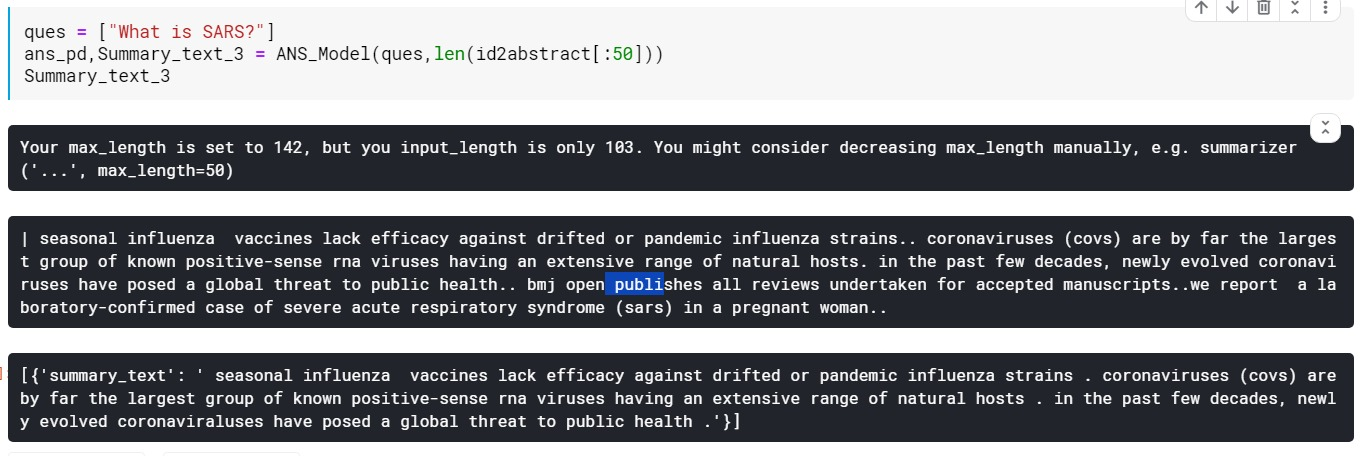

# Method - 4 BERT with Linear model & covid_bert_base QA model

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM


model_QA = AutoModelForMaskedLM.from_pretrained("deepset/covid_bert_base")

print(model_QA)
tokenizer_QA = AutoTokenizer.from_pretrained("deepset/covid_bert_base")

device = torch.device("cuda")

model_QA = model_QA.to(device)
model_QA = model_QA.eval()

In [ ]:
import torch
import torch.nn as nn

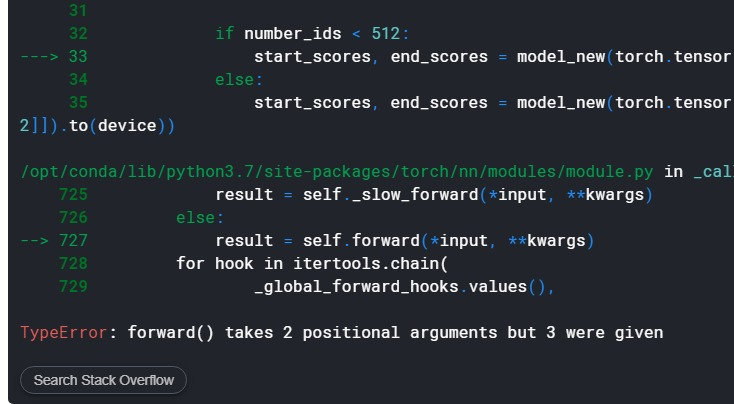

In [ ]:
class AddedNewLayer(nn.Module):
    
    def __init__(self, model):
        super(AddedNewLayer, self).__init__()
        self.model = model
        self.output_linear = nn.Linear(30522, 2)

    def forward(x,x2):
        x = self.model(x,x2)
        x = self.output_linear(x)

        return x

model_new = AddedNewLayer(model_QA)
print(model_new)

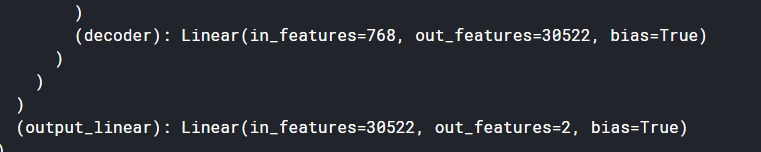

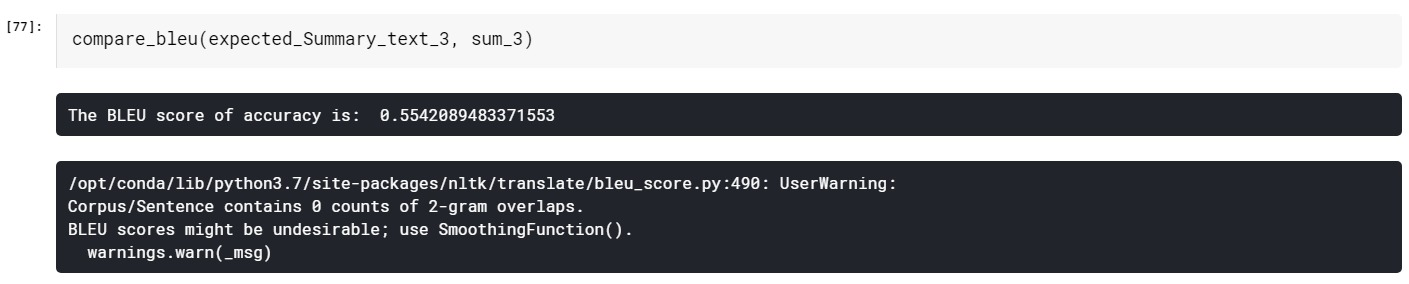

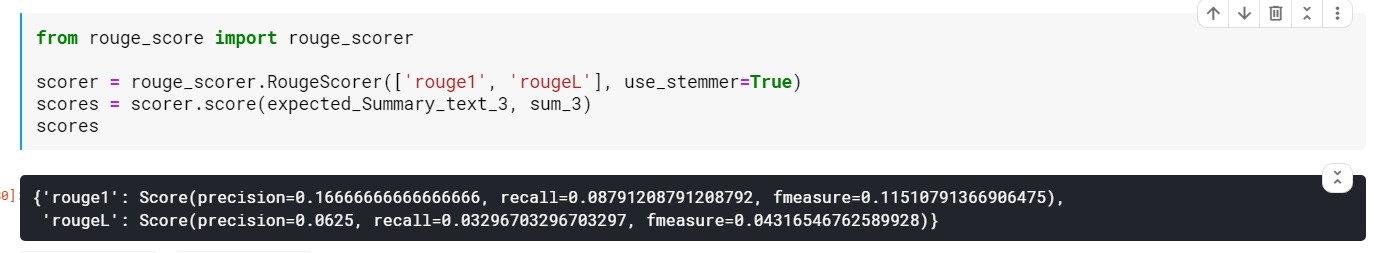

# References

- BERTScore: https://github.com/Tiiiger/bert_score
- BLEU Score: https://machinelearningmastery.com/calculate-bleu-score-for-text-python/#:~:text=Crash%2DCourse%20Now-,Bilingual%20Evaluation%20Understudy%20Score,in%20a%20score%20of%200.0.
- QA Using bert pretrained model by SQuAD: https://github.com/google-research/bert
- All tasks list: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/tasks
- BERT model: https://www.kaggle.com/dirktheeng/anserini-bert-squad-for-semantic-corpus-search
- Dataset: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge